In [5]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sbn
import numpy as np

In [3]:
xpr = pd.read_excel('../data/xpr_screen/Ven_vs_DMSO_D14_results.xlsx', sheet_name='gene')
xpr.head()

,Gene,total,not_filtered,num_sig,min_qvalue,min_abslfc,lfc_min,lfc_mean,lfc_max,num_up,num_down,tiers,mid_lfc,mid_pval,sig_mid_lfc,sig_mid_pval,camera_dir,camera_pval,camera_qval
0,GSTA5,5,2,2,9.517058e-174,3.038079,3.038079,4.626264,6.214449,2,0,Tier1,6.214449,1.659641e-176,6.214449,1.659641e-176,Up,2.371030e-06,0.001878
1,DYDC2,5,2,2,1.083782e-169,2.947118,2.947118,3.827816,4.708514,2,0,Tier1,4.708514,2.190197e-172,4.708514,2.190197e-172,Up,1.753111e-08,0.000073
2,MSH2,5,2,2,8.895794e-161,2.173088,2.173088,3.256758,4.340427,2,0,Tier1,4.340427,2.386618e-163,4.340427,2.386618e-163,Up,4.554670e-06,0.002617
3,MRPL13,5,2,2,5.017264e-156,2.220757,2.220757,4.269445,6.318133,2,0,Tier1,6.318133,1.615274e-158,6.318133,1.615274e-158,Up,6.922496e-06,0.003599
4,C1orf50,5,2,2,1.612515e-132,2.330332,2.330332,3.200278,4.070223,2,0,Tier1,4.070223,9.733845e-135,4.070223,9.733845e-135,Up,1.424027e-06,0.001312


In [21]:
dtis = pd.read_csv('/home/teddy/local/TKG-DTI/extdata/meta/targetome__drug_targets_gene.csv')
dtis.head()

,inhibitor,Symbol,can_smiles,inchikey
0,ABT-737,BAD,CN(C)CCC(CSC1=CC=CC=C1)NC2=C(C=C(C=C2)S(=O)(=O...,HPLNQCPCUACXLM-PGUFJCEWSA-N
1,Palbociclib,CCND1,CC1=C(C(=O)N(C2=NC(=NC=C12)NC3=NC=C(C=C3)N4CCN...,AHJRHEGDXFFMBM-UHFFFAOYSA-N
2,Flavopiridol,CCNT1,CN1CCC(C(C1)O)C2=C(C=C(C3=C2OC(=CC3=O)C4=CC=CC...,BIIVYFLTOXDAOV-YVEFUNNKSA-N
3,Bortezomib (Velcade),PSMA1,B(C(CC(C)C)NC(=O)C(CC1=CC=CC=C1)NC(=O)C2=NC=CN...,GXJABQQUPOEUTA-RDJZCZTQSA-N
4,Bortezomib (Velcade),PSMA2,B(C(CC(C)C)NC(=O)C(CC1=CC=CC=C1)NC(=O)C2=NC=CN...,GXJABQQUPOEUTA-RDJZCZTQSA-N


In [25]:
ven_targs = dtis[lambda x: x.inhibitor == 'Venetoclax'].Symbol.unique()
ven_targs

array(['BCL2', 'BCL2L1', 'BCL2L2'], dtype=object)

In [26]:
xpr[lambda x: x.Gene.isin(ven_targs)]

,Gene,total,not_filtered,num_sig,min_qvalue,min_abslfc,lfc_min,lfc_mean,lfc_max,num_up,num_down,tiers,mid_lfc,mid_pval,sig_mid_lfc,sig_mid_pval,camera_dir,camera_pval,camera_qval
22,BCL2,5,2,2,4.493999e-35,4.924509,4.924509,7.237041,9.549573,2,0,Tier1,9.549573,5.247710e-36,9.549573,5.247710e-36,Up,0.009717,0.476864
63,BCL2L1,5,2,2,6.106329e-07,2.013307,-3.058396,-2.535852,-2.013307,0,2,Tier1,-2.013307,3.741337e-07,-2.013307,3.741337e-07,Down,0.122152,0.999295
845,BCL2L2,5,3,2,1.390623e-08,1.940527,-2.752322,-2.346424,-1.940527,0,2,Tier3,-1.940527,1.000309e-04,-2.752322,6.866627e-09,Down,0.182108,0.999295


In [29]:
preds = pd.read_csv('/home/teddy/local/TKG-DTI/output/tkg/COMPLEX2/FOLD_0/158198c6-1947-40f4-ad62-4ab94a0f3163/predictions.csv')
preds = preds.merge(dtis[['inhibitor', 'inchikey']].drop_duplicates(), left_on='drug_name', right_on='inchikey')
preds.head()

,drug,protein,score,drug_name,prot_name,train,valid,test,negatives,prob,inhibitor,inchikey
0,0,0,-19.014920,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A,False,False,False,True,0.057351,Erlotinib,AAKJLRGGTJKAMG-UHFFFAOYSA-N
1,0,1,-17.755966,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A1BG,False,False,False,True,0.145373,Erlotinib,AAKJLRGGTJKAMG-UHFFFAOYSA-N
2,0,2,-15.308866,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A1CF,False,False,False,True,0.316466,Erlotinib,AAKJLRGGTJKAMG-UHFFFAOYSA-N
3,0,3,-15.661852,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A2M,False,False,False,True,0.291786,Erlotinib,AAKJLRGGTJKAMG-UHFFFAOYSA-N
4,0,4,-15.957707,AAKJLRGGTJKAMG-UHFFFAOYSA-N,A3GALT2,False,False,False,True,0.271101,Erlotinib,AAKJLRGGTJKAMG-UHFFFAOYSA-N


In [41]:
pred_ven_targs = preds[lambda x: (x.inhibitor == 'Venetoclax') & (x.negatives)]
pred_ven_targs = pred_ven_targs.sort_values('score', ascending=False).reset_index(drop=True)[['inhibitor', 'prot_name', 'prob']]
pred_ven_targs = pred_ven_targs.merge(xpr[['Gene', 'mid_pval', 'camera_dir']], left_on='prot_name', right_on='Gene').dropna()
pred_ven_targs.head()



,inhibitor,prot_name,prob,Gene,mid_pval,camera_dir
0,Venetoclax,ERBB2,0.589171,ERBB2,1.728424e-02,Down
1,Venetoclax,EGFR,0.587291,EGFR,2.086829e-03,Up
2,Venetoclax,OGG1,0.552096,OGG1,3.648399e-11,Up
3,Venetoclax,SRSF2,0.537166,SRSF2,7.712905e-01,Down
4,Venetoclax,CCND1,0.536229,CCND1,4.275682e-12,Up


In [ ]:
# Overlap between Tier 1 gene essentiality (sens/res) and Top N venetoclax predictions 

mid_pval vs prob: -0.007505854906623904
mid_pval vs prob (up): 0.02455420176885521
mid_pval vs prob (down): -0.0218184302718135


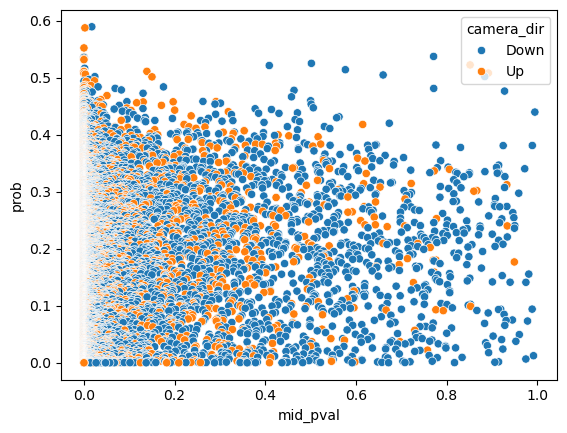

In [44]:
r_all = np.corrcoef(pred_ven_targs['mid_pval'], pred_ven_targs['prob'])[0, 1]
r_up = np.corrcoef(pred_ven_targs[lambda x: x.camera_dir == 'Up']['mid_pval'], pred_ven_targs[lambda x: x.camera_dir == 'Up']['prob'])[0, 1]
r_down = np.corrcoef(pred_ven_targs[lambda x: x.camera_dir == 'Down']['mid_pval'], pred_ven_targs[lambda x: x.camera_dir == 'Down']['prob'])[0, 1]
print('mid_pval vs prob:', r_all)
print('mid_pval vs prob (up):', r_up)
print('mid_pval vs prob (down):', r_down)

plt.figure()
sbn.scatterplot(x='mid_pval', y='prob', hue='camera_dir', data=pred_ven_targs)
#plt.plot(pred_ven_targs['mid_pval'], pred_ven_targs['prob'], 'k.', alpha=0.5)
plt.xlabel('mid_pval')
plt.ylabel('prob')
plt.show()

In [46]:
pred_ven_targs[lambda x: x.camera_dir == 'Up'].head()

,inhibitor,prot_name,prob,Gene,mid_pval,camera_dir
1,Venetoclax,EGFR,0.587291,EGFR,2.086829e-03,Up
2,Venetoclax,OGG1,0.552096,OGG1,3.648399e-11,Up
4,Venetoclax,CCND1,0.536229,CCND1,4.275682e-12,Up
6,Venetoclax,ERBB3,0.532895,ERBB3,6.992075e-23,Up
7,Venetoclax,AQP1,0.531498,AQP1,6.184181e-06,Up


# compare to pred to sensitivity (dir: down)

In [58]:
res = preds[lambda x: x.negatives]
res = res.sort_values('score', ascending=False).reset_index(drop=True)[['inhibitor', 'prot_name', 'prob']]
top_res = res.head(1000).merge(xpr[['Gene', 'mid_pval', 'camera_dir']].sort_values('mid_pval', ascending=True).head(1000), left_on='prot_name', right_on='Gene').dropna()
top_res.head()

,inhibitor,prot_name,prob,Gene,mid_pval,camera_dir
0,Cediranib,FLT3,0.912961,FLT3,5.631135e-17,Up
1,Cediranib (AZD2171),FLT3,0.912961,FLT3,5.631135e-17,Up
2,Motesanib (AMG-706),FLT3,0.894040,FLT3,5.631135e-17,Up
3,Motesanib,FLT3,0.894040,FLT3,5.631135e-17,Up
4,Vatalanib,FLT3,0.873287,FLT3,5.631135e-17,Up


In [62]:
top_res[lambda x: x.camera_dir == 'Down'].sort_values('prob', ascending=False).head(100)

,inhibitor,prot_name,prob,Gene,mid_pval,camera_dir
6,BMS-345541,CDK2,0.855798,CDK2,7.306406e-18,Down
15,AT7519,CDK2,0.824492,CDK2,7.306406e-18,Down
16,At-7519,CDK2,0.824492,CDK2,7.306406e-18,Down
33,SNS-032 (BMS-387032),CDK2,0.784733,CDK2,7.306406e-18,Down
34,Bms-387032,CDK2,0.784733,CDK2,7.306406e-18,Down
58,Alvocidib,CDK2,0.758200,CDK2,7.306406e-18,Down
59,Flavopiridol,CDK2,0.758200,CDK2,7.306406e-18,Down
